# Imports

In [1]:
import cv2,glob
from yolo_segmentation import YOLOSegmentation
from matplotlib import pyplot as plt
import numpy as np

c:\Users\Desktop\anaconda3\envs\pytorch_gpu\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Built in classes in Yolo

In [2]:
names={0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted plant', 59: 'bed', 60: 'dining table', 61: 'toilet', 62: 'tv', 63: 'laptop', 64: 'mouse', 65: 'remote', 66: 'keyboard', 67: 'cell phone', 68: 'microwave', 69: 'oven', 70: 'toaster', 71: 'sink', 72: 'refrigerator', 73: 'book', 74: 'clock', 75: 'vase', 76: 'scissors', 77: 'teddy bear', 78: 'hair drier', 79: 'toothbrush'}

In [3]:
len(names)

80

# Load Model

In [4]:
# it will automatically download weight from ultralytics repo
ys = YOLOSegmentation(model_path="yolov8x-seg.pt")


# Predictions and visualisation


0: 384x640 18 persons, 1 tie, 2 cell phones, 1 toothbrush, 482.0ms
Speed: 18.0ms preprocess, 482.0ms inference, 18.0ms postprocess per image at shape (1, 3, 640, 640)


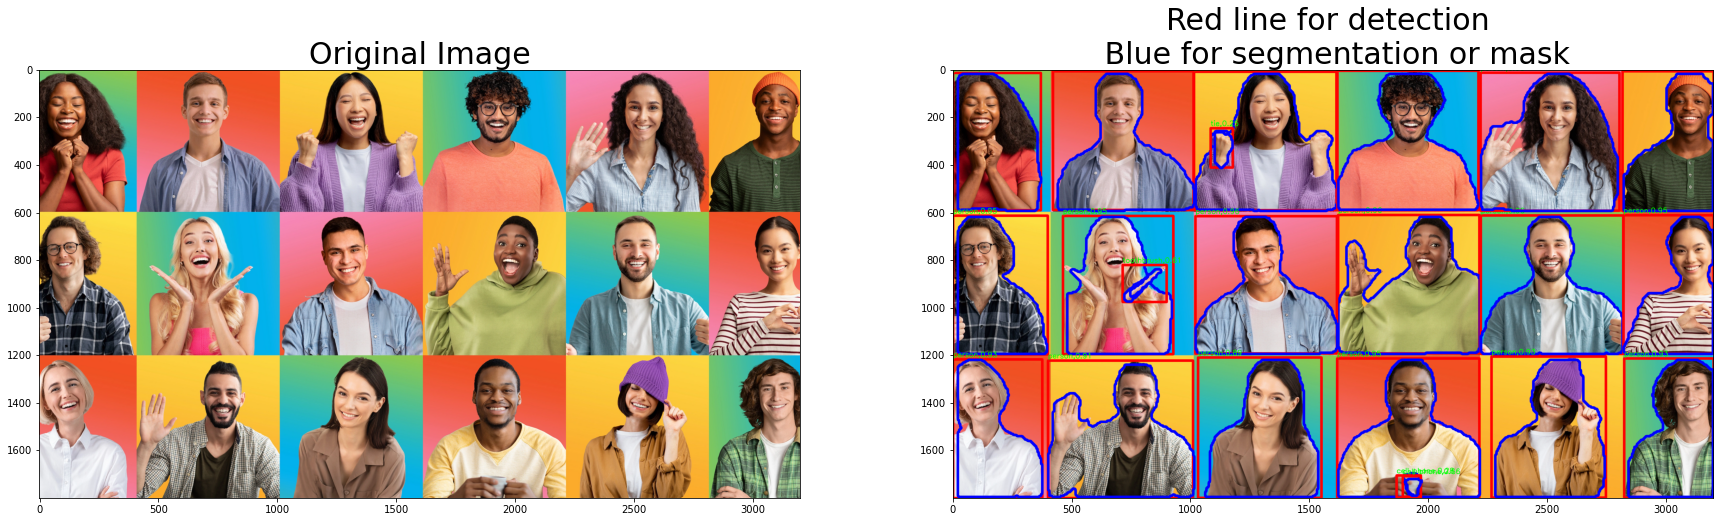


0: 640x640 1 book, 943.0ms
Speed: 18.0ms preprocess, 943.0ms inference, 11.0ms postprocess per image at shape (1, 3, 640, 640)


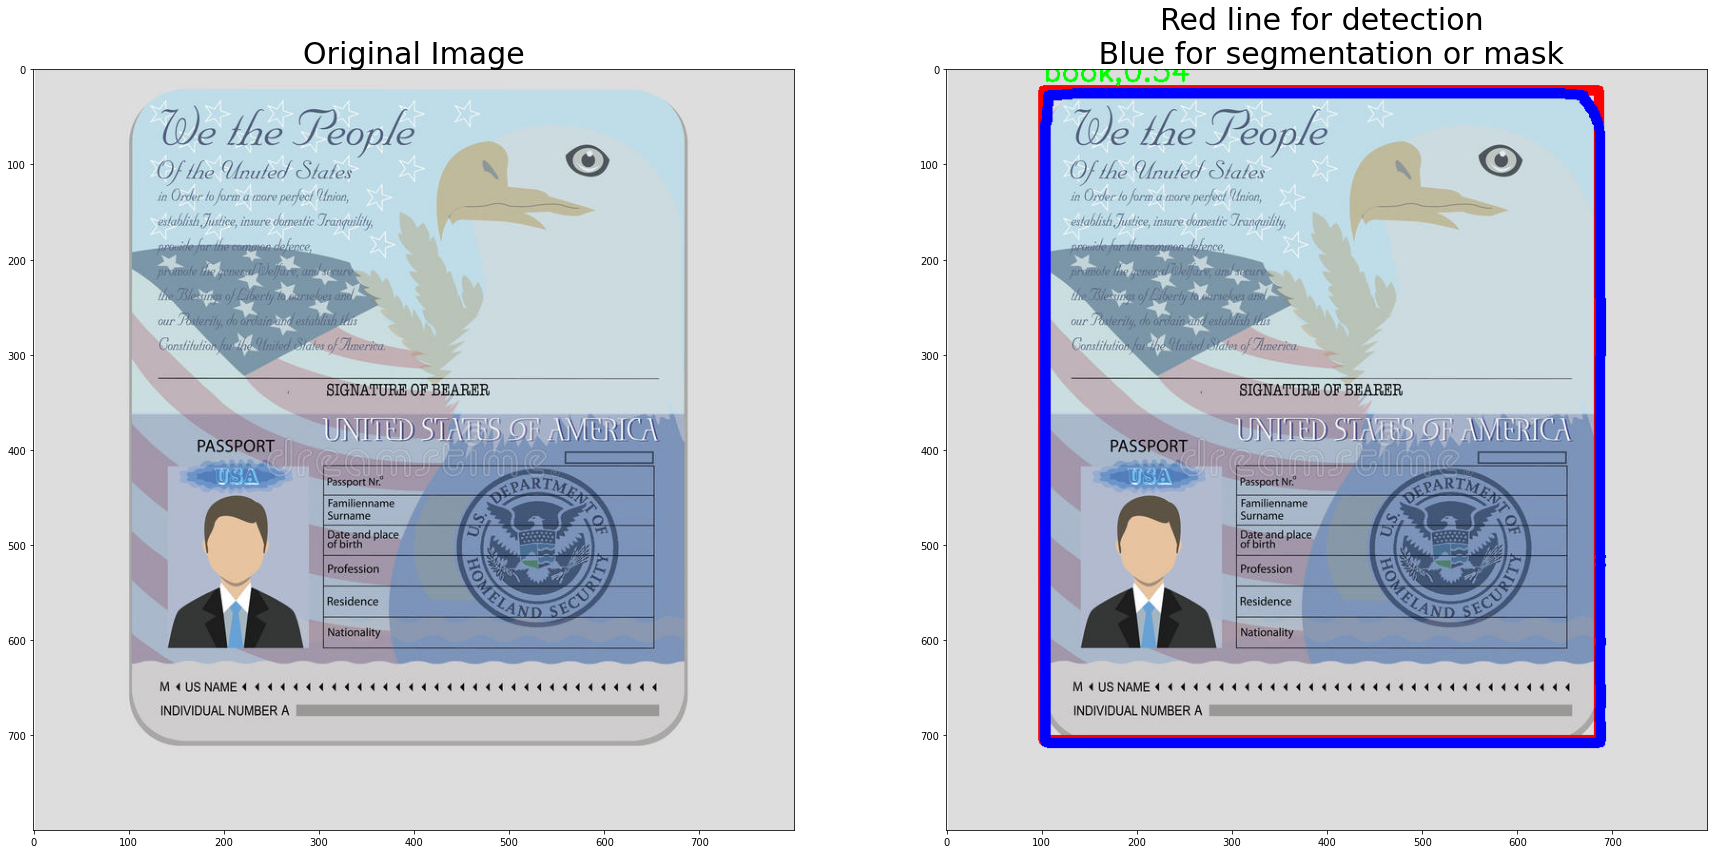


0: 384x640 8 sports balls, 1 baseball bat, 647.0ms
Speed: 5.0ms preprocess, 647.0ms inference, 15.0ms postprocess per image at shape (1, 3, 640, 640)


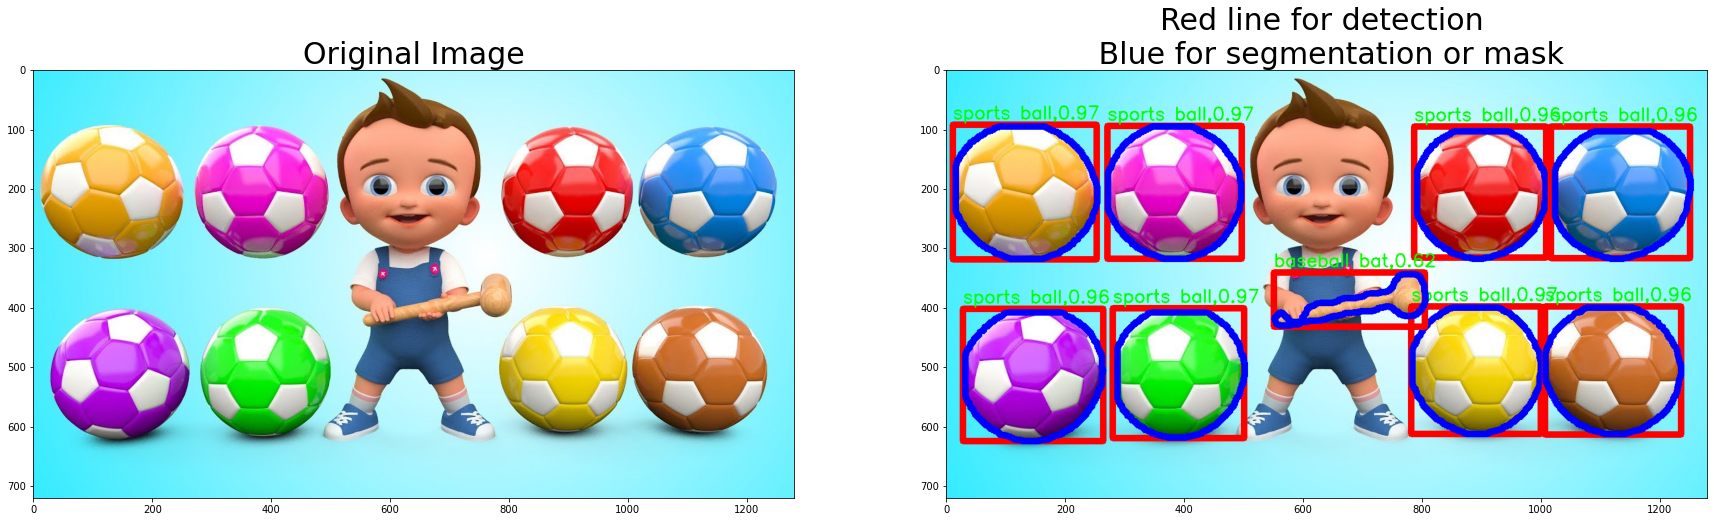


0: 448x640 1 person, 1 book, 672.0ms
Speed: 7.0ms preprocess, 672.0ms inference, 10.0ms postprocess per image at shape (1, 3, 640, 640)


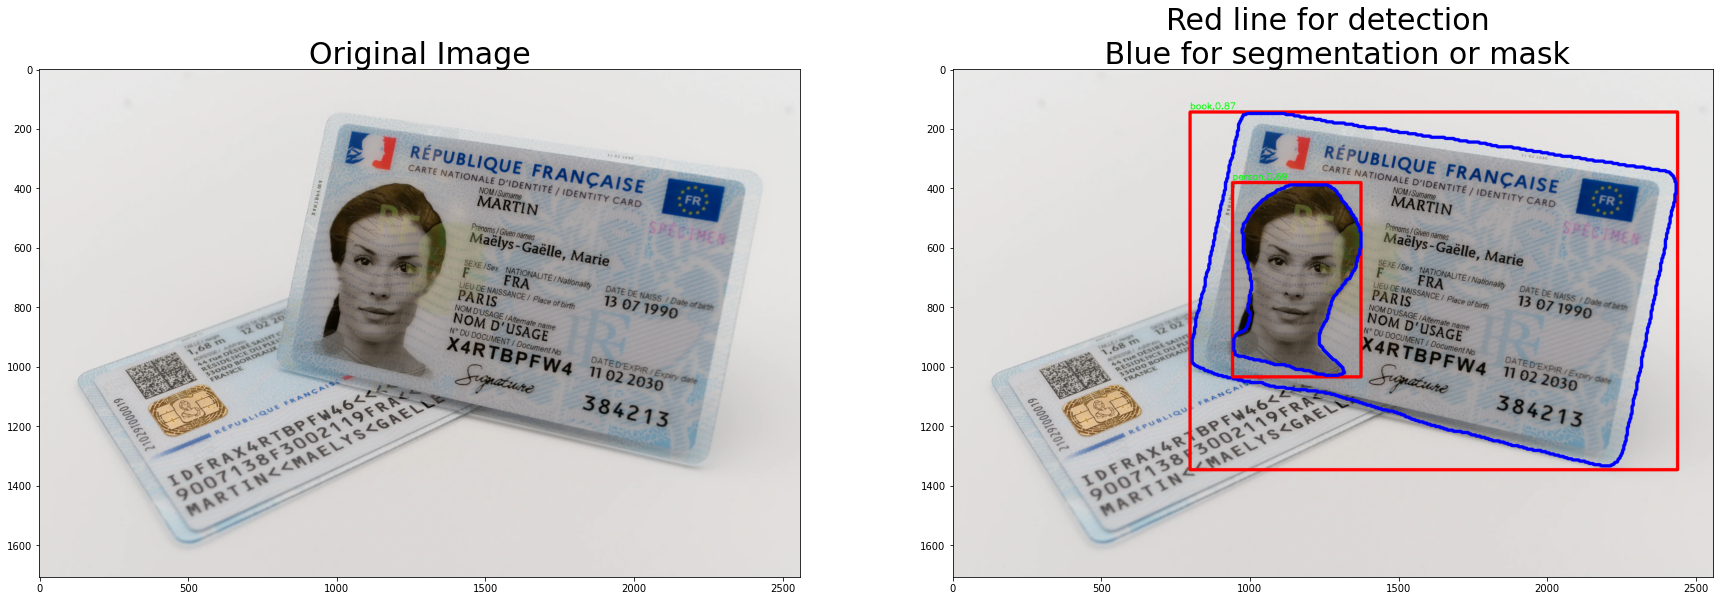


0: 384x640 1 truck, 708.0ms
Speed: 7.0ms preprocess, 708.0ms inference, 7.0ms postprocess per image at shape (1, 3, 640, 640)


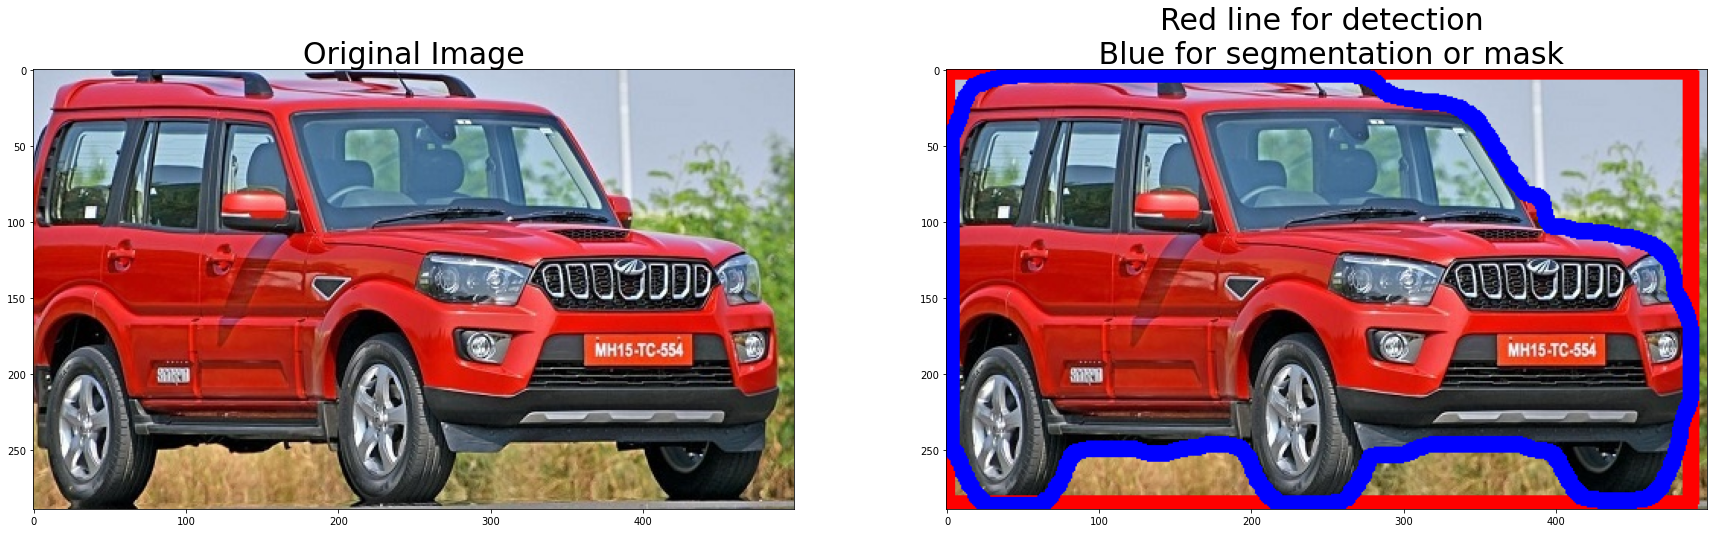


0: 480x640 1 frisbee, 693.0ms
Speed: 8.0ms preprocess, 693.0ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)


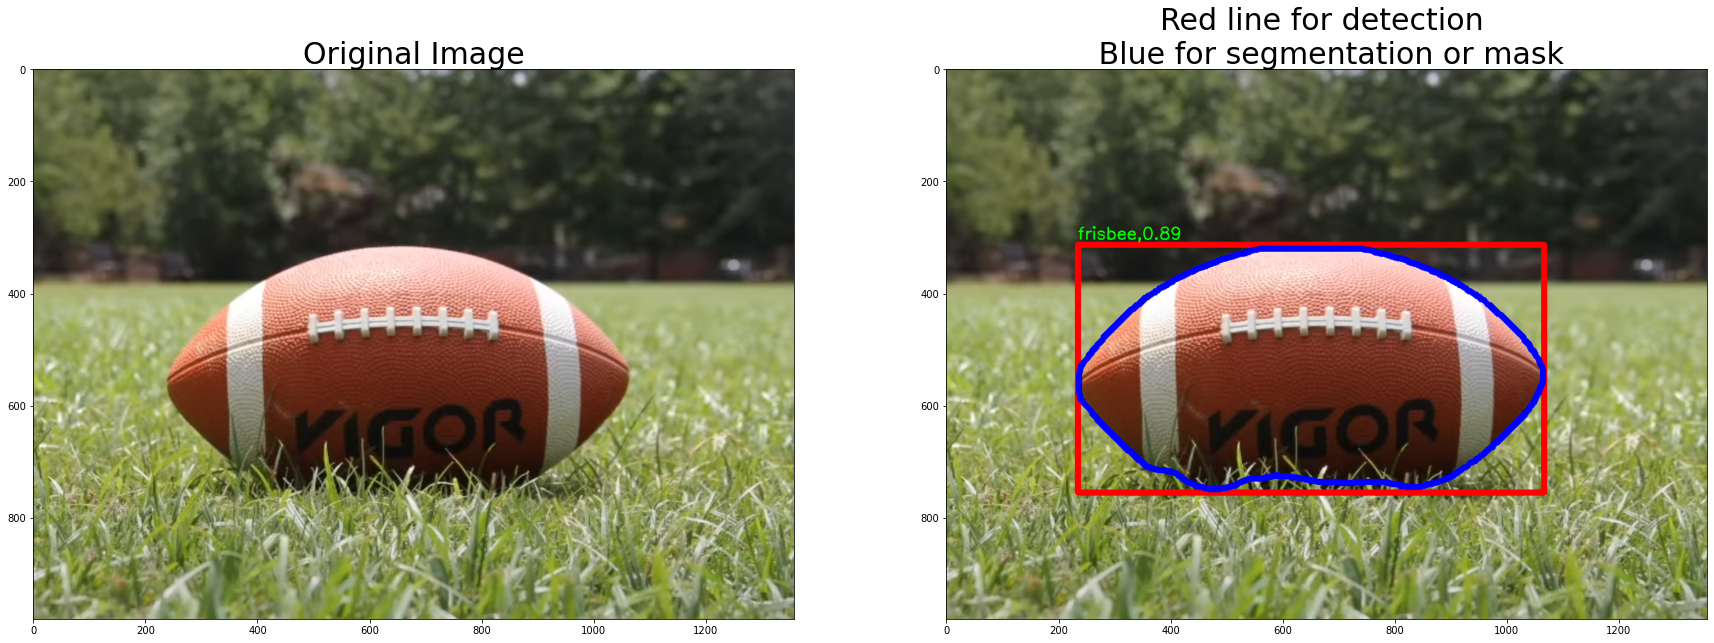

In [5]:
# Load images from the 'dataset' folder
for image_path in glob.glob('data_for_test_builtin_yolo_model/*'):
    # Read the image
    img = cv2.imread(image_path)
    # Create a copy of the image
    new_img = img.copy()
    # Detect objects in the image using the detect_objects function
    bboxes, class_ids, segmentation_contours_idx, scores = ys.detect(img)
    
    # Check if any objects are detected
    if bboxes is not None:
        # Loop through all the detected objects
        for bbox, class_id, segmentations, score in zip(bboxes, class_ids, segmentation_contours_idx, scores):
            # Extract the coordinates of the bounding box
            x, y, x2, y2 = bbox
            # Draw a red rectangle around the object
            cv2.rectangle(new_img, (x, y), (x2, y2), (0, 0, 255), 10)
            # Add the object class name and confidence score to the image
            cv2.putText(new_img, f'{names[class_id]},{score}', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)
            # Draw a blue polyline around the object's segmentation mask
            cv2.polylines(new_img, [segmentations], True, (255, 0, 0), 10)
        
        # Display the original and the modified image using matplotlib
        plt.figure(figsize=(30,30))
        plt.subplot(1,2,1)
        plt.title('Original Image', size=30)
        plt.imshow(img[...,::-1])
        
        plt.subplot(1,2,2)
        plt.title("Red line for detection \n Blue for segmentation or mask", size=30)
        plt.imshow(new_img[...,::-1])
        plt.show()